In [1]:
pip install qiskit

     |████████████████████████████████| 6.0MB 6.8MB/s 
     |████████████████████████████████| 18.0MB 158kB/s 
     |████████████████████████████████| 235kB 49.9MB/s 
     |████████████████████████████████| 215kB 55.7MB/s 
     |████████████████████████████████| 2.1MB 47.4MB/s 
     |████████████████████████████████| 1.5MB 36.3MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
     |████████████████████████████████| 194kB 50.1MB/s 
     |████████████████████████████████| 71kB 11.6MB/s 
     |████████████████████████████████| 614kB 42.1MB/s 
     |████████████████████████████████| 3.2MB 41.0MB/s 
     |████████████████████████████████| 6.3MB 43.1MB/s 
  Created wheel for qiskit: filename=qiskit-0.27.0-cp37-none-any.whl size=10505 sha256=2b0e204e986ab83cd3923445b078415814814e4e9787972e0e0e9d53c335bb20
  Stored in directory: /root/.cache/pip/wheels/c6/54/d9/f0f711dc20aff31947456951374132d0e23ec527da8c15295d
  Created wheel for python-constraint: filename=python_constraint-1.4.0-p

In [2]:
from qiskit import  *
import numpy as np
from collections import Counter
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.tools.visualization import plot_histogram

In [89]:
#Task 3
def quantum_circuit(n,n_qubits,q_prob,trials):
  backend = Aer.get_backend('qasm_simulator')
  q = QuantumRegister(n,'q')
  c = ClassicalRegister(n,'c')
  prob={}
  sum_prob = sum(q_prob)
  print('Sum of Probability:',sum_prob)
  if int(sum_prob)==1:
    for i in range(trials):
      qc = QuantumCircuit(q,c)
      circuit = np.random.choice(n_qubits,1,q_prob)
      if circuit =='x':
        qc.x(range(n))
      elif circuit  =='y':
        qc.y(range(n))
      elif circuit  =='z':
        qc.z(range(n))
      else:
        continue
      qc.measure(range(n),range(n))
      job = execute(qc,backend)
      counts = job.result().get_counts()
      #print(counts)
      prob = Counter(prob) + Counter(counts)
    return prob
  else:
    count = 0
    n_qubits.append('temp')
    x = 1- sum(q_prob)
    print('Probability of 1-sum:',x)
    q_prob.append(x)
    while (count<trials):
      qc = QuantumCircuit(q,c)
      circuit = np.random.choice(n_qubits,1,q_prob)
      if circuit == 'temp':
        continue
      elif circuit =='x':
        qc.x(range(n))
      else:
        continue 
      count +=1
      qc.measure(range(n),range(n))
      job = execute(qc,backend)
      counts = job.result().get_counts()
      #print(counts)
      prob = Counter(prob) + Counter(counts)
    return prob        
  

Sum of Probability: 0.30000000000000004
Probability of 1-sum: 0.7


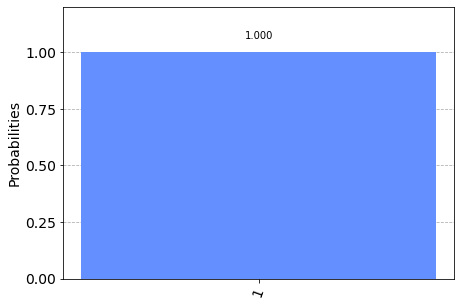

In [90]:
stat =quantum_circuit(1,['x','y','z'],[0.1,0.1,0.1],100)
plot_histogram(stat)

Sum of Probability: 1.5


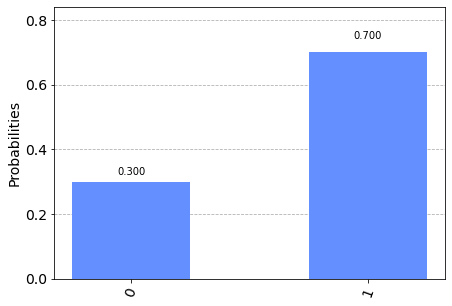

In [80]:
stat =quantum_circuit(1,['x','y','z'],[0.3,0.4,0.8],100)
plot_histogram(stat)